In [1]:
%%html
<style>
:root {
    --primary: #7b8e2d;
    /* Used for subtitles, captions and code */
    --secondary: #5e705f;
    /* Links  */
    --links: #7b8e2d;
    /* Background color of jupyter input cell */
    --jupyter-in-cell-bg: #e3ffd28c;
}


.rise-enabled .reveal section img {
  display: block;
  margin-left: auto;
  margin-right: auto;
  min-width: 50%;
}

.rise-enabled .text_cell_render.rendered_html p,
.rise-enabled .text_cell_render.rendered_html li{
    font-size: 30px
}

.rise-enabled .text_cell_render.rendered_html h2{
    font-size: 54px
}


.cell .maintitle, .cell .maintitle * {
    margin-left: auto;
    margin-right: auto;
    text-align: center;
    color: var(--primary) !important
}


.cell h1, .cell h3, .cell em, .cell strong, .cell li::marker, 
.cell span.MathJax, .cell code {
    color: var(--primary) !important
}

.cell .decisionmatrix-dim {
    color: black !important;
}
        
.cell h2, .cell h4 {
    color: var(--secondary) !important
}

.cell a {
    color: var(--links) !important;
    text-decoration: none !important; 
}
                

.cell a::after {
    content: "⬏"; 
    color: var(--primary) !important
}
    
.cell table.clean, .cell table.clean tr, .cell table.clean td {
    background-color: white;
    border: none;
}
        
</style>

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

<div class="maintitle">
    <h2> Métodos Multicriterio Orientados al Tratamiento Automático de Datos</h2>
    <h3 class="subtitle">Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
    <span>FaMAF-UNC, 2022 </span>
</div>

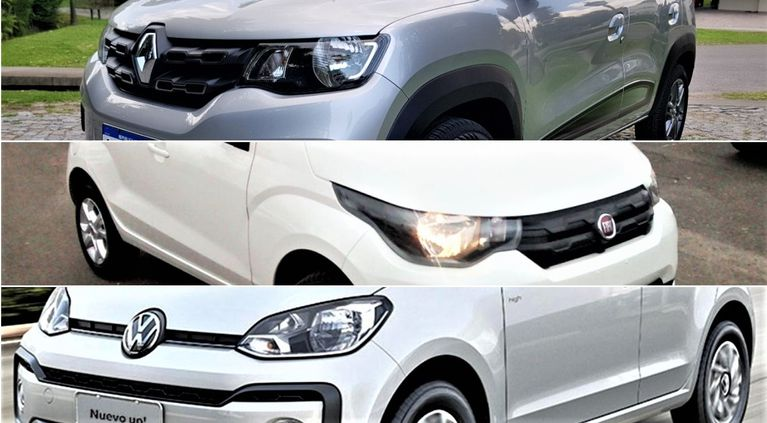

**Docentes:**
- Dr. Juan B Cabral (FaMAF-UNC, CONAE, IATE-OAC-CONICET)
- Mg. Nadia Luczywo (FCE-UNC)

## Sobre la imágen anterior

Un familia decidió invertir en un nuevo automóvil de bajo costo que pueda utilizar con comodidad en la ciudad. Luego de revisar la oferta redujo las *alternativas* de compra a tres autos similares del tipo city-car: *VW Up*, *Fiat Moby* y *Renault Kwid*. 

En general, esta familia, valora: La velocidad del vehículo, la autonomía, el confort, la seguridad y el precio.

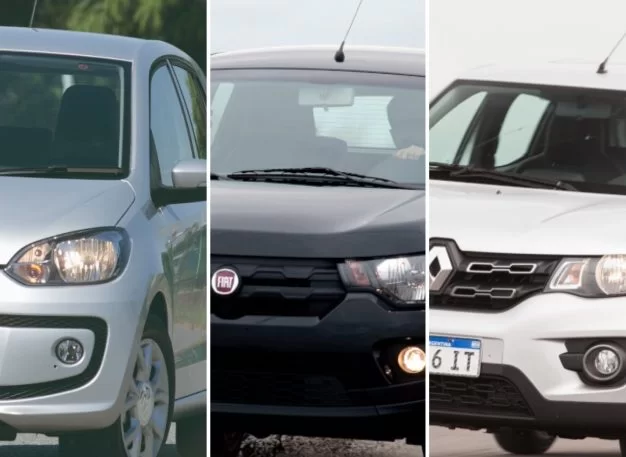

## Sobre la imágen anterior - cont.

Analicemos un poco:

- *Velocidad del vehículo:* Se mide en $Km/h$, y mientras *mas alta* mejor.
- *Autonomía:* Supongamos que en tanque lleno, y mientras mas $Km$ realiza el vehículo mejor.
- *Confort:* Lo sacamos de alguna revista y le ponemos algún puntaje del 1-10, donde 1 es lo peor, y 10 es lo mejor.
- *Seguridad:* Sacamos el indice de estrellas de [Latin NCAP](https://www.latinncap.com). 5 estrellas lo tienen los autos mas seguros.
- *Precio:* Sacamos el precio del [Registo Automotor](https://www.registroautomotor.info), y obviamente mientras mas barato, mejor.

## Sobre la imágen anterior - cont.

O en otras palabras los *criterios* son:

- *Velocidad del vehículo:* $Km/h$ (continua a $maximizar$).
- *Autonomía:* $Km$ (continua a $maximizar$).
- *Confort:* [1-10] (categorica a $maximizar$).
- *Seguridad:* [1-5] (categorica a $maximizar$).
- *Precio:* Pesos (continua a $minimizar$).

Ademas no tenemos que funciones generan los valores de cada uno de ellos

## Sobre la imágen anterior - Final.

Que preguntas razonables podemos hacer a este set de datos?

1. Cual es el mejor auto?
2. Hay algunos autos mejores que los demas?
3. Hay algun orden desde el mejor al peor?
4. Hay alguna alternativa claramente mejor?
5. Hay algun criterio mas importante que los demas?
6. Si asumimos error, que tan estble son las soluciones de las preguntas *1*, *2* y *3*?

## Disclaimers

- No ~me considero~ soy un experto en el tema.
- Es un tema que me resulta super interesante pero esta bastante sub-utilizado en la ciencia de datos.
- El curso esta orientado a poner sobre la mesa una familia de tecnicas de análisis de datos.
- Estas disciplinas estan metidas dentro de la Investigación de operaciones.

> *Hint*
>
> El caso de ejemplo carece de la dimensionalidad suficiente para ver todas 
> las ventajas de la disciplina

## Decisión Multicriterio Discreta

DMD, es el contexto que brinda un marco teórico y distintas metodologías para la resolución de problemas de decisión en los que se presenta la elección de una de entre varias alternativas, en consideración a diversos ejes o puntos de vista denominados atributos u objetivos.

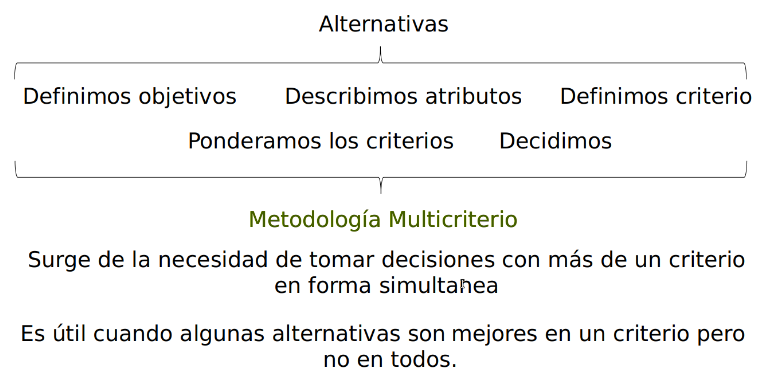

## Tipos de DMD ($\alpha$, $\beta$, $\gamma$)

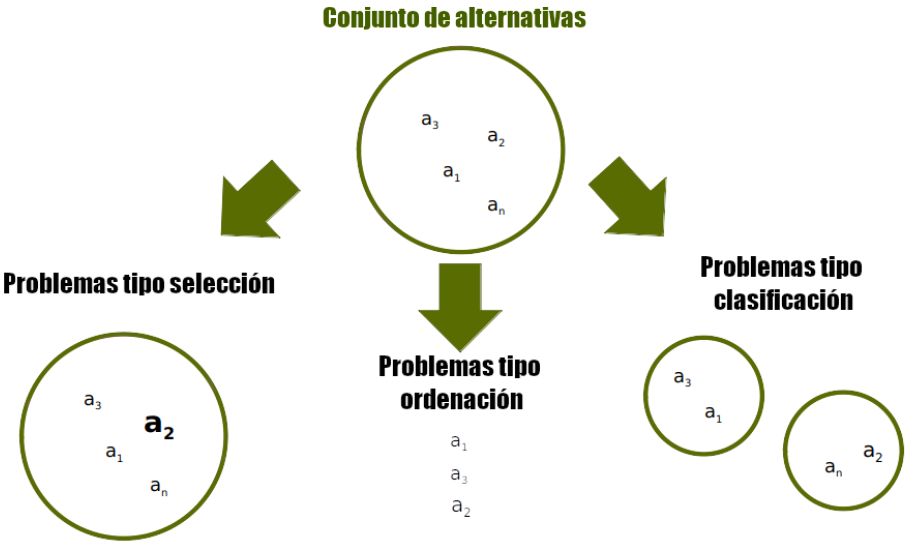

## Scikit-Criteria

- **Scikit-Criteria** es una colección de metodos y herramentas para análisis de decisiones con criterios múltiples.
- Está integrado en al stack científico de Python. 
- Es de código abierto y comercialmente utilizable.
- Esta "inspirado" en la forma de trabajo de Scikit-learn (robar es malo).
- Tiene un diseño pensando en exponer la semántica del MCDM.
- Todos sos objtos son *inmutables*.
- Todo devuelve una copia.

http://scikit-criteria.org/

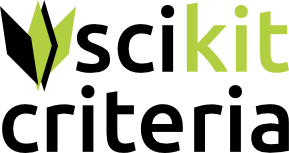

## Scikit-Criteria: La competencia

![PyPI - Downloads](https://img.shields.io/pypi/dm/scikit-criteria?label=Scikit-Criteria&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pydecision?label=pydecision&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pymcda?label=pymcda&style=for-the-badge)
![PyPI - Downloads](https://img.shields.io/pypi/dm/pymcdm?label=pymcdm&style=for-the-badge)

### Instalación

```bash
$ <pip|conda|mamba> install scikit-criteria
```

## MCDA: El proceso completo

1. Identificar y definir las **alternativas** de decisión, que deben ser factibles, exhaustivas y excluyentes. 
2. Definir los **atributos a optimizar**. Identificar objetivos que son de maximización o de minimización.    
3. Asociar a cada objetivo o atributo, una **función de utilidad** que permita expresar una valoración cuantitativa de cada alternativa respecto al atributo ($atributo + función = criterio$). 
4. Consignar las valoraciones de cada alternativa respecto de cada criterio en una matriz de decisión.
5. Fija “umbrales de satisfacción” para cada criterio, de manera tal que se eliminen las alternativas que en algún criterio no los superan y Preánalisis de dominancia. 
6. Si se requiere, transformar las valoraciones de las alternativas correspondientes a criterios de maximización.
7. Ponderar o asignar valoraciones a los criterios, conforme a la importancia relativa que tienen para el decisor, mediante una función de utilidad. Consignar en la matriz de decisión los $U(C_j)= w_jv$
8. Escalar/Normalizar todas las valoraciones, consignadas en la matriz de decisión completa, para llevarlas a una escala común y hacerlas comparables. Obtener así la matriz de decisión definitiva.
9. Seleccionar un **MÉTODO DE AGREGACIÓN**.

## Problema

A fin de decidir comprar una serie de bonos, una empresa estudió 5 inversiones candidatas: PE, JN, AA, FX, MM y GN. El departamento de finanzas decide considerar los siguientes criterios para la selección:

- Criterio 1 **ROE**: Rendimiento % por cada peso invertido. Sentido de optimidad, Maximizar 
- Criterio 2 **CAP**: Años de capitalización en el mercado. Sentido de optimidad, Maximizar  
- Criterio 3 **RI**: Puntos de riesgo del título valor. Sentido de optimidad, Minimizar 

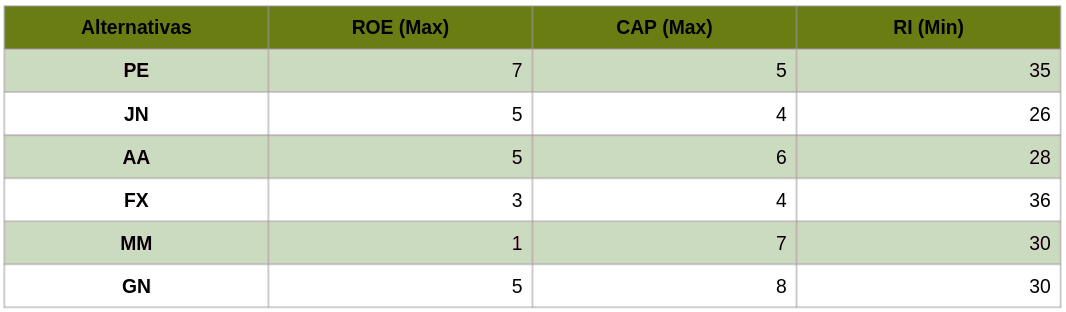

## Etapas 1-3: Manual

1. Identificar y definir claramente las **alternativas** de decisión, que deben ser factibles, exhaustivas y excluyentes. 
2. Definir los **atributos a optimizar**. Identificar objetivos que son de maximización o de minimización.    
3. Asociar a cada objetivo o atributo, una **función de utilidad** que permita expresar una valoración cuantitativa de cada alternativa respecto al atributo ($atributo + función = criterio$). 

> Los criterios tienen que tener las siguientes propiedades:
>
> - **Exhaustividad:** Los aspectos relevantes del problema deben aparecer reflejarse en los  criterios.
> - **Coherencia:** Las preferencias globales del decisor deben ser coherentes con los criterios.
> - **No redundancia entre criterios:** Si no se considera puede ocurrir que se duplique importancia a criterios redundantes.

## Etapa 4: `skcriteria.DecisionMatrix`

4. Consignar las valoraciones de cada alternativa respecto de cada criterio en una matriz de decisión

In [3]:
import skcriteria as skc

dm = skc.mkdm(
    matrix=[[7, 5, 35], 
            [5, 4, 26], 
            [5, 6, 28], 
            [3, 4, 36],
            [1, 7, 30],
            [5, 8, 30]],
    objectives=[max, max, min],
    alternatives=["PE", "JN", "AA", "FX", "MM", "GN"],
    criteria=["ROE", "CAP", "RI"]
)

dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

- Se puede acceder a las alternativas y a los criterios como propiedades.
- Heredan todas las funcionalidades de un `numpy.array` ademas de implementar funciones "tipo" `dict`.

In [4]:
dm.alternatives

_ACArray(['PE', 'JN', 'AA', 'FX', 'MM', 'GN'], dtype=object)

In [5]:
dm.alternatives["PE"]

ROE     7
CAP     5
RI     35
Name: PE, dtype: int64

In [6]:
dm.criteria

_ACArray(['ROE', 'CAP', 'RI'], dtype=object)

In [7]:
dm.criteria["ROE"]

PE    7
JN    5
AA    5
FX    3
MM    1
GN    5
Name: ROE, dtype: int64

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Se puede acceder a objetivos y tipos de datos con un formato tipo `pandas.Serie`.

In [8]:
dm.objectives

ROE    MAX
CAP    MAX
RI     MIN
Name: Objectives, dtype: object

In [9]:
dm.iobjectives

ROE    1
CAP    1
RI    -1
dtype: int8

In [10]:
dm.dtypes

ROE    int64
CAP    int64
RI     int64
dtype: object

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

La matriz interna de valores (sin objetivos, ni pesos) puede accederse con un formato `pandas.DataFrame`

In [11]:
dm.matrix

Criteria,ROE,CAP,RI
Alternatives,,,
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

`DecisionMatrix` tambien soporta operaciones de slice y dice como los `DataFrames` con los accessors `loc`, `iloc` (alternatives/filas) y `[]` (criterios/columnas)

In [12]:
dm[["RI", "ROE"]]  # criteria slice

,RI[▲ 1.0],ROE[▼ 1.0]
PE,35,7
JN,26,5
AA,28,5
FX,36,3
MM,30,1
GN,30,5


In [13]:
dm.loc[["PE", "AA"]]  # alternative slice

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
AA,5,6,28


In [14]:
dm.iloc[:-1]  # alternative slice by order

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

El atributo `stats` accede a todas las funcionalidades estadisticas subyacentes de `pandas.DataFrame`

In [15]:
dm.stats() # equivalente a dm.stats.describe() o dm.stats("describe")

,ROE,CAP,RI
count,6.000000,6.000000,6.000000
mean,4.333333,5.666667,30.833333
std,2.065591,1.632993,3.920034
min,1.000000,4.000000,26.000000
25%,3.500000,4.250000,28.500000
50%,5.000000,5.500000,30.000000
75%,5.000000,6.750000,33.750000
max,7.000000,8.000000,36.000000


In [16]:
dm.stats.corr()  # dm.stats("corr")

,ROE,CAP,RI
ROE,1.000000,-0.197642,0.032933
CAP,-0.197642,1.000000,-0.229117
RI,0.032933,-0.229117,1.000000


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

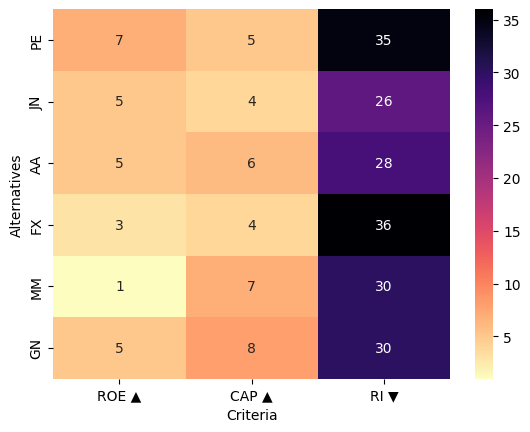

In [17]:
dm.plot(cmap="magma_r");  # dm.plot("heatmap", cmap="magma_r") | dm.plot.heatmap(cmap="magma_r")

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

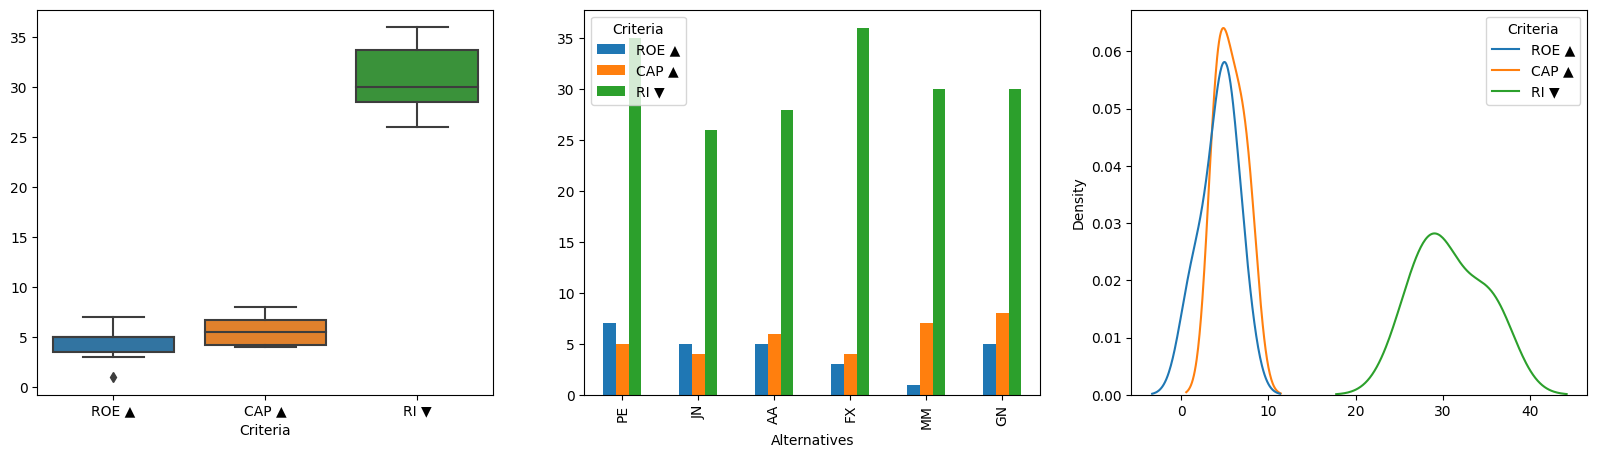

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
dm.plot.box(ax=axs[0])
dm.plot.bar(ax=axs[1])
dm.plot.kde(ax=axs[2]);  # ojo con los pocos datos, esto es porquería!

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Posee una amplia variedad de plots, tanto como para pesos como para la matriz de alternativas

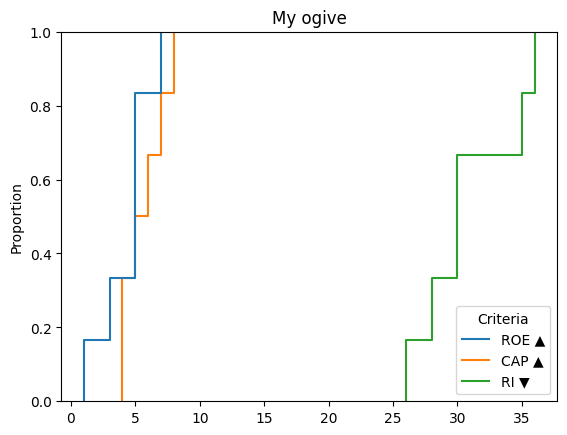

In [19]:
ax = dm.plot.ogive()
ax.set_title("My ogive");

## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

La única forma de alterar una `DecisionMatrix` es con el método `copy()`

In [20]:
dm.copy(criteria="A B C".split())

,A[▲ 1.0],B[▲ 1.0],C[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Etapa 4: `skcriteria.DecisionMatrix` (cont.)

Por ultimo (por ahora) se puede convertir las `DecisionMatrix` en un `DataFrame` resumen, util para compartir datos con usuarios no-Python.

In [21]:
dm.to_dataframe()

,ROE,CAP,RI
objectives,MAX,MAX,MIN
weights,1.0,1.0,1.0
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Erapa 5: Preánalisis de dominancia y satisfacción

- Fija “umbrales de satisfacción” para cada criterio, de manera tal que se eliminen las alternativas que en algún criterio no los superan.
- **Preánalisis de dominancia**. 
    - Si existe una alternativa dominante es sin duda la mejor elección, si no se quiere de una ordenación.
    - Una alternativa $A_i$ es dominada si existe al menos otra $A_j$, tal que $A_i$  “peor” o igual $A_j$ en 
      todos los criterios y estrictamente “peor” a $A_j$ para al  menos un criterio. 
    - En símbolos: $A_j \succeq A_i$
    
**Si aplicamos:** Solo se aceptaran alternativas que rindan al menos el $2\%$, y $FX$ es peor a todas las demás

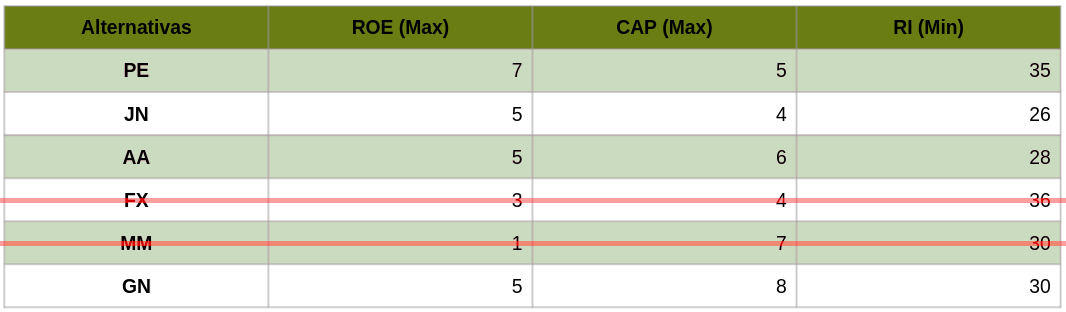
   

## Etapa 5: `DecisionMatrix.dominance`

Todas las herramientas de analisis de dominancia estan dentro del atributo `dominance` de *DecisionMatrix*

Por ejemplo se puede evaluar que $A_i \succeq A_j$

In [22]:
dm.dominance()  # o dm.dominance("dominance") | dm.dominance.dominance()

Dominated,PE,JN,AA,FX,MM,GN
Dominators,,,,,,
PE,False,False,False,True,False,False
JN,False,False,False,True,False,False
AA,False,False,False,True,False,False
FX,False,False,False,False,False,False
MM,False,False,False,False,False,False
GN,False,False,False,True,True,False


o $A_i \succ A_j$

In [23]:
dm.dominance(strict=True)  # o dm.dominance("dominance", strict=True) | dm.dominance.dominance(strict=True)

Strictly dominated,PE,JN,AA,FX,MM,GN
Strict dominators,,,,,,
PE,False,False,False,True,False,False
JN,False,False,False,False,False,False
AA,False,False,False,True,False,False
FX,False,False,False,False,False,False
MM,False,False,False,False,False,False
GN,False,False,False,True,False,False


## Etapa 5: `DecisionMatrix.dominance`

Tambien podemos ver en cuantos criterios domina una alternativa a la otra con el método `bt()` (better-than) y en cuantos empatan con `eq` (equals)

In [24]:
dm.dominance.bt()  # dm.dominance("bt")

Worse than,PE,JN,AA,FX,MM,GN
Better than,,,,,,
PE,0,2,1,3,1,1
JN,1,0,1,2,2,1
AA,2,1,0,3,2,1
FX,0,0,0,0,1,0
MM,2,1,1,2,0,0
GN,2,1,1,3,2,0


In [25]:
dm.dominance.eq()  # dm.dominance("eq")

Equals to,PE,JN,AA,FX,MM,GN
Equals to,,,,,,
PE,6,0,0,0,0,0
JN,0,6,1,1,0,1
AA,0,1,6,0,0,1
FX,0,1,0,6,0,0
MM,0,0,0,0,6,1
GN,0,1,1,0,1,6


## Etapa 5: `DecisionMatrix.dominance`

Puede resumirse las tablas de dominancia en una unica `Series` que identifica si una alternativa es o no dominada

In [26]:
dm.dominance.dominated()  # dm.dominance("dominates")

Alternatives
PE    False
JN    False
AA    False
FX     True
MM     True
GN    False
Name: Dominated, dtype: bool

In [27]:
dm.dominance.dominated(strict=True)  # dm.dominance("dominates", strict=True)

Alternatives
PE    False
JN    False
AA    False
FX     True
MM    False
GN    False
Name: Strictly dominated, dtype: bool

## Etapa 5: `DecisionMatrix.dominance`

Tambien se puede estudiar la dominancia por alternativa

In [28]:
dm.dominance.dominators_of("FX")  # dm.dominance("dominators_of", a="FX")

array(['PE', 'JN', 'AA', 'GN'], dtype=object)

In [29]:
dm.dominance.dominators_of("MM")

array(['GN'], dtype=object)

In [30]:
dm.dominance("dominators_of", a="MM", strict=True)

array([], dtype='<U1')

## Etapa 5: `DecisionMatrix.dominance`

O se puede comparar de a pares

In [31]:
dm.dominance.compare("FX", "JN")

Criteria               Performance
                     ROE    CAP     RI            
Alternatives FX    False  False  False           0
             JN     True  False   True           2
Equals             False   True  False           1

In [32]:
dm.dominance.compare("MM", "JN")

Criteria               Performance
                     ROE    CAP     RI            
Alternatives MM    False   True  False           1
             JN     True  False   True           2
Equals             False  False  False           0

## Etapa 5: `DecisionMatrix.plot.dominance`

Visualmente se puede explorar la domunancia de dos formas:

1. Graficar la matriz de dominancia con sus valores de referencia

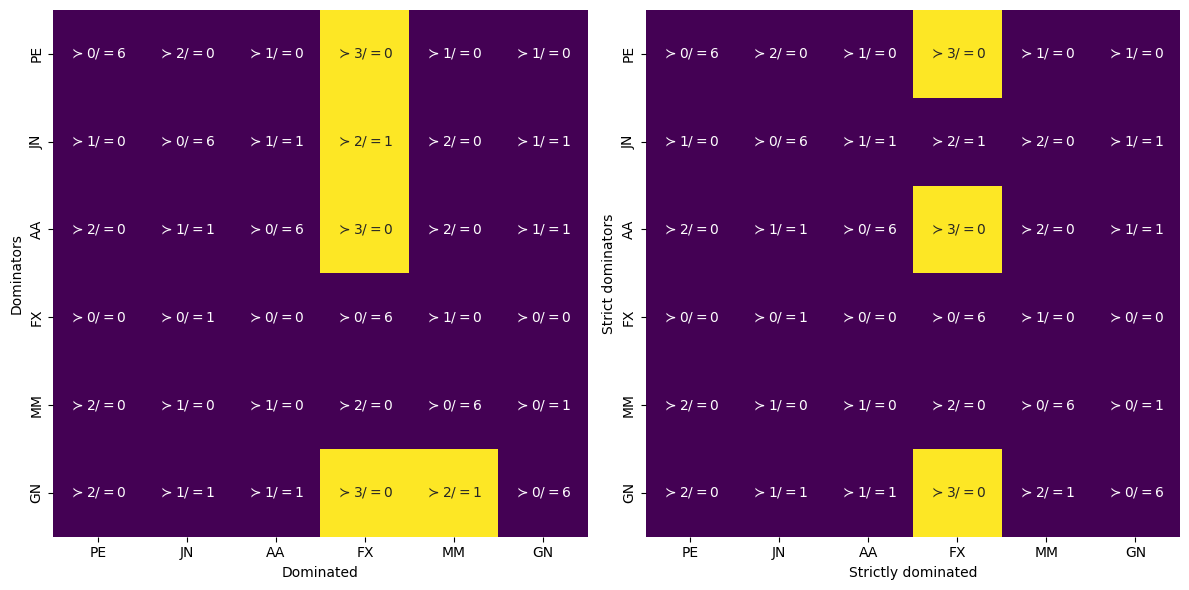

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

dm.plot.dominance(strict=False, ax=axs[0])
dm.plot.dominance(strict=True, ax=axs[1])

fig.tight_layout();

## Etapa 5: `DecisionMatrix.plot.frontier`

2. Verificar la fronteras pareto-eficientes segun diferentes pares de criterio

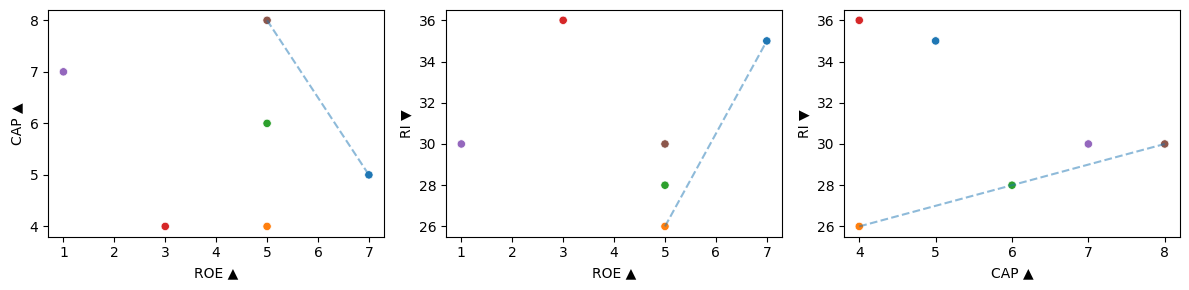

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
combs = [('ROE', 'CAP'), ('ROE', 'RI'), ('CAP', 'RI')]

for (x, y), ax in zip(combs, axs):
    dm.plot.frontier(x=x, y=y, strict=False, ax=ax, legend=False)  # y strict True?
    
fig.tight_layout();

## Etapa 5: `skcriteria.preprocessing.filters`

Siguiendo el unciado que rezaba: "Si aplicamos: Solo se aceptaran alternativas que rindan al menos el 2%, y 𝐹𝑋 es peor a todas las demás"

Podemos utilizar el modulo `filters` para lograr ambos objetivos. 

En primer lugar podemos quedarnos con los $ROE \ge 2$.

La clase `filters.Filter` recibe como parametros un *dict* en cual cada llave es el nombre de un criterio, y cada valor es una funcion arbitraria que recibe la columna criterio como parametro y retorna un arreglo de con la misma cantidad de elementos que el array, y solo conserva las alternativas donde todos los criterios son `True`

In [35]:
from skcriteria.preprocessing import filters

flt = filters.Filter({"ROE": lambda crit: crit >= 2})
flt

Filter(criteria_filters={'ROE': <function <lambda> at 0x7fcefc01a3b0>}, ignore_missing_criteria=False)

In [36]:
flt.transform(dm)

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
GN,5,8,30


## Etapa 5: `skcriteria.preprocessing.filters`

Por simplicidad y rendimiento computacional, se ofrece una colleccion de 

- `filters.FilterEQ` `->` $=$ (igualdad)
- `filters.FilterGE` `->` $\ge$ (mayor o igual)
- `filters.FilterGT` `->` $\gt$ (mayor)
- `filters.FilterIn` `->` $\in$ (dentro)
- `filters.FilterLE` `->` $\le$ (menor o igual)
- `filters.FilterLT` `->` $\lt$ (menor)
- `filters.FilterNE` `->` $\neq$ (distinto)
- `filters.FilterNotIn` `->` $\notin$ (no dentro)

In [37]:
dm = filters.FilterGE({"ROE": 2}, ignore_missing_criteria=True).transform(dm)
dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
GN,5,8,30


## Etapa 5: `skcriteria.preprocessing.filters`

Tambien hay filtro que elmina las alternativas dominadas o estrictiamente dominadas

In [38]:
flt = filters.FilterNonDominated(strict=True)
flt

FilterNonDominated(strict=True)

In [39]:
dm = flt.transform(dm)
dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
GN,5,8,30


## Etapa 6: Todo a maximizar

Conforme a la situación, si esta lo requiere, transformar las valoraciones de las alternativas correspondientes a criterios de minimización.
- Si los valores tienen cambio de signo: Sumamos un escalar (k) a todos los valores del criterio. 
  Donde $k \geq min$ de la serie.
- Si los valores no tienen cambio de signo pero con sentido de optimidad *minimizante*:
  
  - O usamos la inversa donde $\min{(A_i)} \equiv \max{(\frac{1}{A_i})}$
  - O negamos el criterio donde $\min{(A_i)} \equiv \max{(-{A_i})}$
  
  Esto suele opcional según el método pero recomendable (Los pesos suelen ser problema)
  
La costumbre en la disciplina es privilegiar a los problemas a $maximizar$.


## Etapa 6: `skcriteria.preprocessing.push_negatives`

Este modulo contiene transformadores útiles para evitar que haya valores negativos, dado que hay funciones de agregación que no los soportan.

Muchos de estos transformadores operan sobre los pesos (`target="weights"`), o sobre la matriz de alternativas (`target="matrix"`), o sobre ambos (`target="both"`). 


In [40]:
dmn = skc.mkdm([[1, -2, 0], [1,  1, 1]], objectives=[max, min, max])
dmn

,C0[▲ 1.0],C1[▼ 1.0],C2[▲ 1.0]
A0,1,-2,0
A1,1,1,1


In [41]:
from skcriteria.preprocessing.push_negatives import PushNegatives
push = PushNegatives(target="matrix")
push

PushNegatives(target='matrix')

In [42]:
dmn = push.transform(dmn)
dmn

,C0[▲ 1.0],C1[▼ 1.0],C2[▲ 1.0]
A0,1,0,0
A1,1,3,1


## Etapa 6: `skcriteria.preprocessing.increment`

`ÀddValueToZero` es un transformador que sirve para evitar valor `0`, algunos metodos no pueden funcionar con estos valores.

Ademas del `target` se necesita proveer que valor va incrementarse en los criterios con valores $0$.


In [43]:
from skcriteria.preprocessing.increment import AddValueToZero
av2z = AddValueToZero(target="matrix", value=.0001)
av2z

AddValueToZero(target='matrix', value=0.0001)

In [44]:
av2z.transform(dmn)

,C0[▲ 1.0],C1[▼ 1.0],C2[▲ 1.0]
A0,1.0,0.0001,0.0001
A1,1.0,3.0001,1.0001


## Etapa 6: `skcriteria.preprocessing.invert_objectives`

Para eliminar los objetivos de minimize el modulo `invert_objectives`, propone dos estrategias

`NegateMinimize` realiza la estrategia de negar los criterios negativos donde $\min{(A_i)} \equiv \max{(-{A_i})}$

In [45]:
from skcriteria.preprocessing.invert_objectives import InvertMinimize, NegateMinimize
NegateMinimize().transform(dm)

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▲ 1.0]
PE,7,5,-35.0
JN,5,4,-26.0
AA,5,6,-28.0
GN,5,8,-30.0


`InvertMinimize` utiliza la inversa donde $\min{(A_i)} \equiv \max{(\frac{1}{A_i})}$

In [46]:
dm = InvertMinimize().transform(dm); dm

,ROE[▲ 1.0],CAP[▲ 1.0],RI[▲ 1.0]
PE,7,5,0.028571
JN,5,4,0.038462
AA,5,6,0.035714
GN,5,8,0.033333


## Etapa 7: Los pesos

Ponderar o asignar valoraciones a los criterios, conforme a la importancia relativa (*AKA pesos/weights*) que tienen para el decisor, mediante una función de utilidad. 

Consignar en la matriz de decisión los $U(C_j)= w_jv$

**Ejemplo:** El decisor determinó que $ROE$ tiene una importancia de $2$, $CAP$ $4$ y $RI 1$

In [47]:
skc.mkdm(
    matrix=[[7, 5, 1/35], 
            [5, 4, 1/26], 
            [5, 6, 1/28], 
            [5, 8, 1/30]],
    objectives=[max, max, max],
    weights=[2, 4, 1], # <<<<<<<<<<< PESOS!
    alternatives=["PE", "JN", "AA", "FN"],
    criteria=["ROE", "CAP", "RI"]
)

,ROE[▲ 2.0],CAP[▲ 4.0],RI[▲ 1.0]
PE,7,5,0.028571
JN,5,4,0.038462
AA,5,6,0.035714
FN,5,8,0.033333


O si queremos agregarr mannualmente los pesos a una matriz ya existente

In [48]:
dm = dm.copy(weights=[2, 4, 1])

## Etapa 7: Los pesos

Obviamente se puede acceder a los pesos de la matriz

In [49]:
dm.weights

ROE    2.0
CAP    4.0
RI     1.0
Name: Weights, dtype: float64

Y tambien se ofrece una de coleccion de plots para visualizar los pesos dentro de `DecisionMatrix.plot` 

> *HINT:* todos los plots de pesos empiezan con **`w`** (`whist`, `wkde`, `wbar`, `wbarh`, `wogive`...)

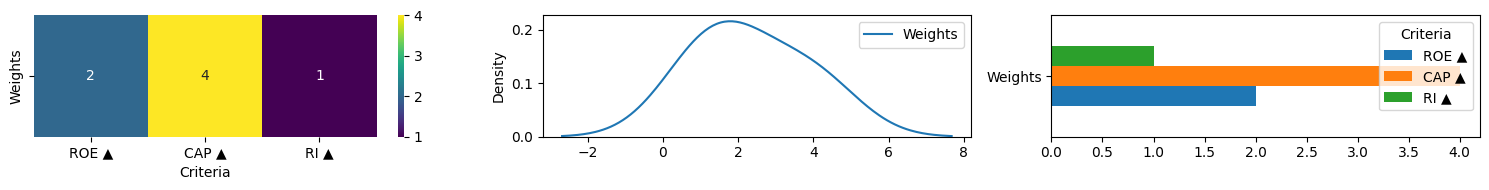

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 2))
dm.plot.wheatmap(ax=axs[0])
dm.plot.wkde(ax=axs[1])  # OJO! basura para pocos datos 
dm.plot.wbarh(ax=axs[2])
fig.tight_layout();

## Etapa 8: Escalado y normalización

Claramente si vemos la matriz original los valores estan bastante fuera de escala, y no sirve de mucho

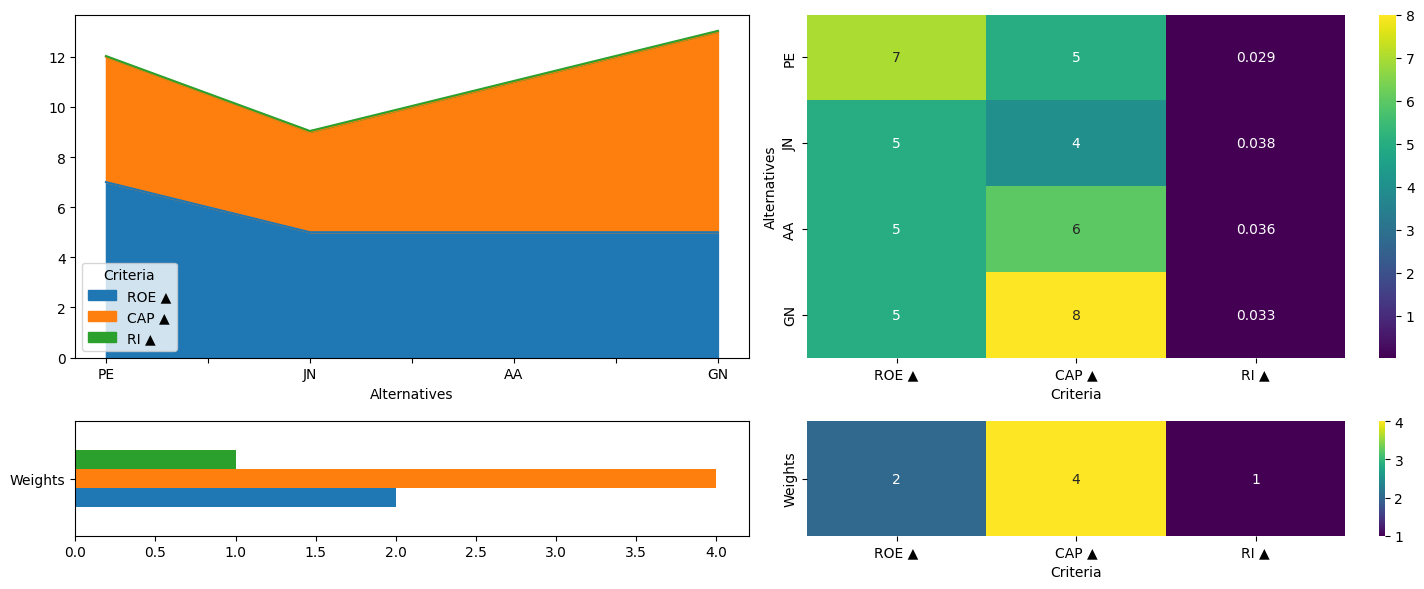

In [51]:
fig, axs = plt.subplots(
    2, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 3], 'height_ratios': [3, 1]})
dm.plot.area(ax=axs[0,0]); dm.plot.heatmap(ax=axs[0, 1])
dm.plot.wbarh(ax=axs[1,0], legend=False); dm.plot.wheatmap(ax=axs[1, 1])
fig.tight_layout();

## Etapa 8: Escalado y normalización


Escalar/Normalizar todas las valoraciones, consignadas en la matriz de decisión completa, para llevarlas a una escala común y hacerlas comparables. Obtener así la matriz de decisión definitiva.

Los pesos se normalizan por separado (Y con suele ser con la suma).


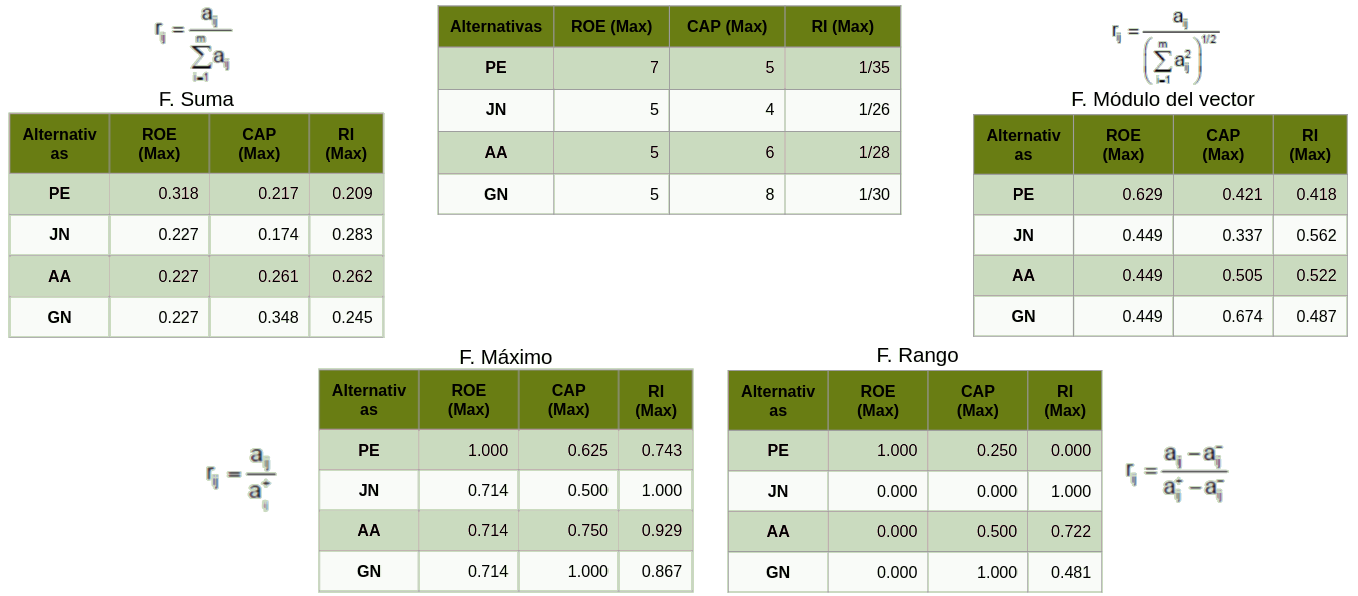
   


## Etapa 8: `skcriteria.preprocessing.scalers`

Todas las funciones de escalado (menos una que vamos a ver en la clase que sigue) viven en el módulo `preprocessing.scalers`.

al igual que *PushNegatives*, todos estos transformadores operan sobre los pesos (`target="weights"`), o sobre la matriz de alternativas (`target="matrix"`), o sobre ambos (`target="both"`). 

Empecemos por el mas popular, el fracción suma, `SumScaler` cuya transformación esta dada por:

$$
    r_{ij} = \frac{a_{ij}}{\sum_{i=1}^{m}a_{ij}}
$$


In [52]:
from skcriteria.preprocessing import scalers
skl = scalers.SumScaler(target="both")  # vamos a escalar la matriz y los pesos
skl

SumScaler(target='both')

In [53]:
sum_scaled = skl.transform(dm)
sum_scaled

,ROE[▲ 0.285714],CAP[▲ 0.571429],RI[▲ 0.142857]
PE,0.318182,0.217391,0.209960
JN,0.227273,0.173913,0.282638
AA,0.227273,0.260870,0.262450
GN,0.227273,0.347826,0.244953


## Etapa 8: `skcriteria.preprocessing.scalers`


La fracción rango, es lo que se conoce como `MinMaxScaler`

$$
    r_{ij} = \frac{a_{ij} - \min{a_i}}{\max{a_i} - \min{a_i}}
$$

Esto hace que $r_{ij}$ en general pertezcan el intervalo $[0, 1]$. Este intervalo es configurable con el parametro `criteria_range`.


In [54]:
skl = scalers.MinMaxScaler(target="both")
skl

MinMaxScaler(clip=False, criteria_range=(0.0, 1.0), target='both')

In [55]:
mm_scaled = skl.transform(dm)
mm_scaled                                                          

,ROE[▲ 0.333333],CAP[▲ 1.000000],RI[▲ 0.000000]
PE,1.0,0.25,0.000000
JN,0.0,0.00,1.000000
AA,0.0,0.50,0.722222
GN,0.0,1.00,0.481481


## Etapa 8: `skcriteria.preprocessing.scalers`


La fracción del maximo o `MaxAbsScaler` se define como

$$
    r_{ij} = \frac{a_{ij}}{\max{a_i}}
$$

In [56]:
skl = scalers.MaxAbsScaler(target="both")
skl

MaxAbsScaler(target='both')

In [57]:
max_scaled = skl.transform(dm)
max_scaled

,ROE[▲ 0.50],CAP[▲ 1.00],RI[▲ 0.25]
PE,1.000000,0.625,0.742857
JN,0.714286,0.500,1.000000
AA,0.714286,0.750,0.928571
GN,0.714286,1.000,0.866667


## Etapa 8: `skcriteria.preprocessing.scalers`

Modulo del vector o `VectorScaler` esta definido como

$$
r_{ij} = \frac{a_{ij}}{\sqrt{\sum_{i=1}^{m}a_{ij}^2}}
$$



In [58]:
skl = scalers.VectorScaler(target="both")
skl

VectorScaler(target='both')

In [59]:
vct_scaled = skl.transform(dm)
vct_scaled

,ROE[▲ 0.436436],CAP[▲ 0.872872],RI[▲ 0.218218]
PE,0.628619,0.421076,0.417547
JN,0.449013,0.336861,0.562082
AA,0.449013,0.505291,0.521934
GN,0.449013,0.673722,0.487138


## Etapa 8: `skcriteria.preprocessing.scalers`

No podria faltar el `StandarScaler`

$$
r_{ij} = \frac{a_{ij} - \mu({a_i})}{\sigma({a_i})}
$$



In [60]:
skl = scalers.StandarScaler(target="both")
skl

StandarScaler(target='both', with_mean=True, with_std=True)

In [61]:
std_scaled = skl.transform(dm)
std_scaled

,ROE[▲-0.267261],CAP[▲ 1.336306],RI[▲-1.069045]
PE,1.732051,-0.507093,-1.500331
JN,-0.577350,-1.183216,1.222959
AA,-0.577350,0.169031,0.466490
GN,-0.577350,1.521278,-0.189117


## Etapa 8: Diferencias en el escalado

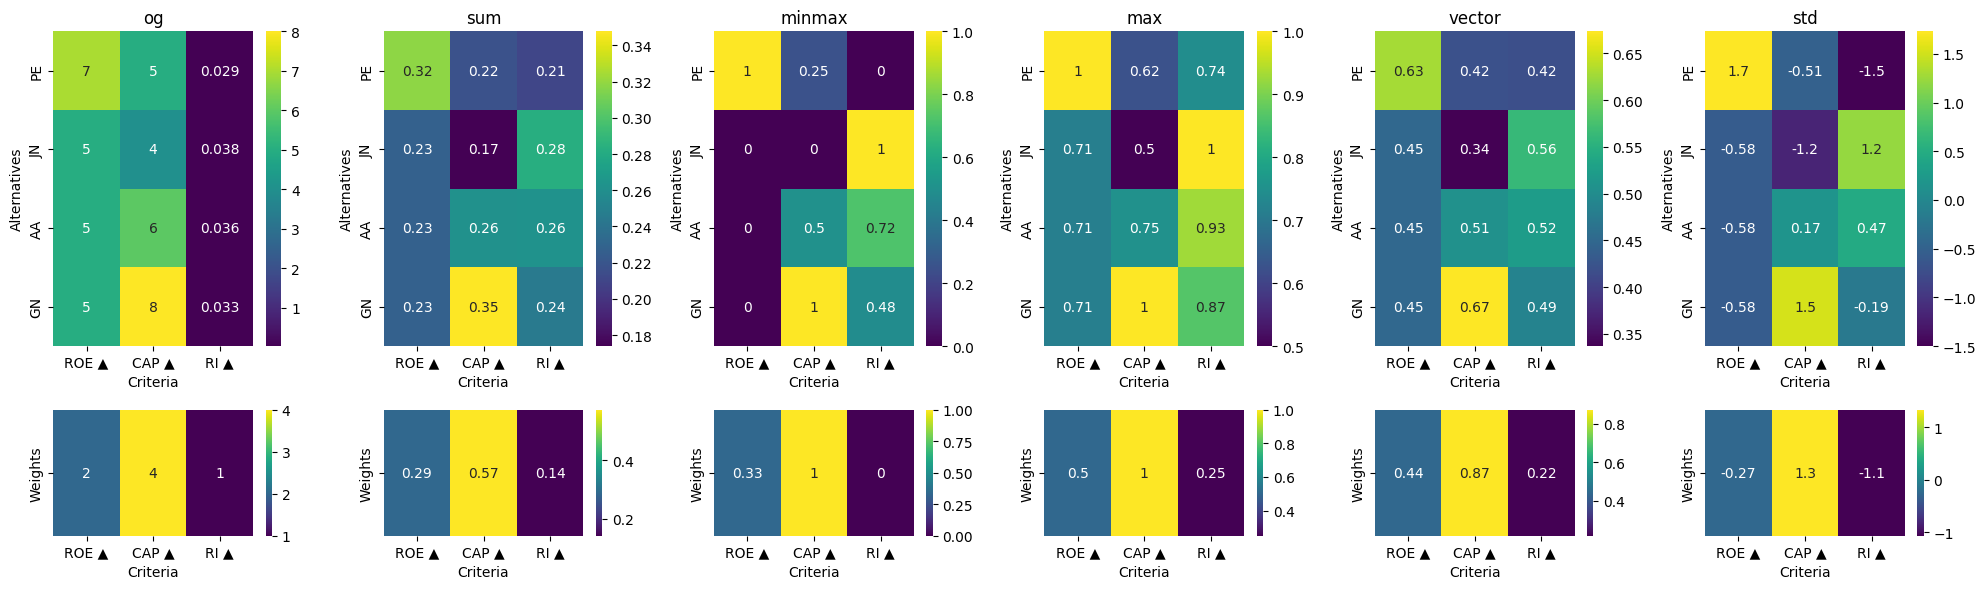

In [62]:
scaled = {"og": dm,
          "sum": sum_scaled, "minmax": mm_scaled, 
          "max": max_scaled, "vector": vct_scaled, "std": std_scaled}

fig, axs = plt.subplots(2, len(scaled), figsize=(20, 6), 
                        gridspec_kw={'height_ratios': [5, 2]})
for (sname, sdm), ax in zip(scaled.items(), axs.T):
    sdm.plot.heatmap(ax=ax[0])
    sdm.plot.wheatmap(ax=ax[1])
    ax[0].set_title(sname)
fig.tight_layout()

## Etapa 8: Diferencias en el escalado

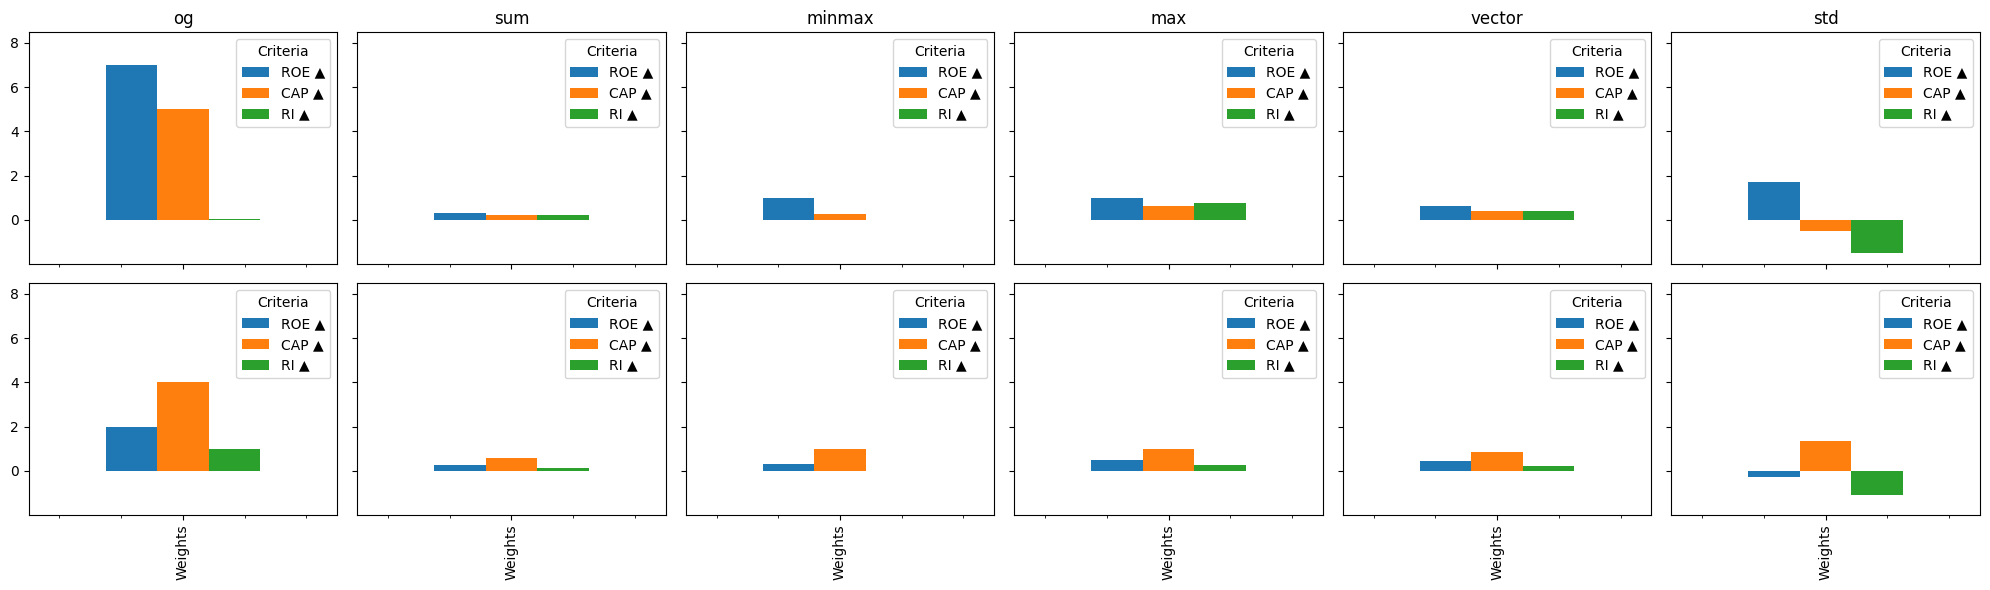

In [63]:
fig, axs = plt.subplots(2, len(scaled), figsize=(20, 6), sharey=True, sharex=True)  # compartimos eje
for (sname, sdm), ax in zip(scaled.items(), axs.T):
    sdm.plot.bar(ax=ax[0])
    sdm.plot.wbar(ax=ax[1])
    ax[0].set_title(sname)
fig.tight_layout()

## Etapa 8: Diferencias en el escalado

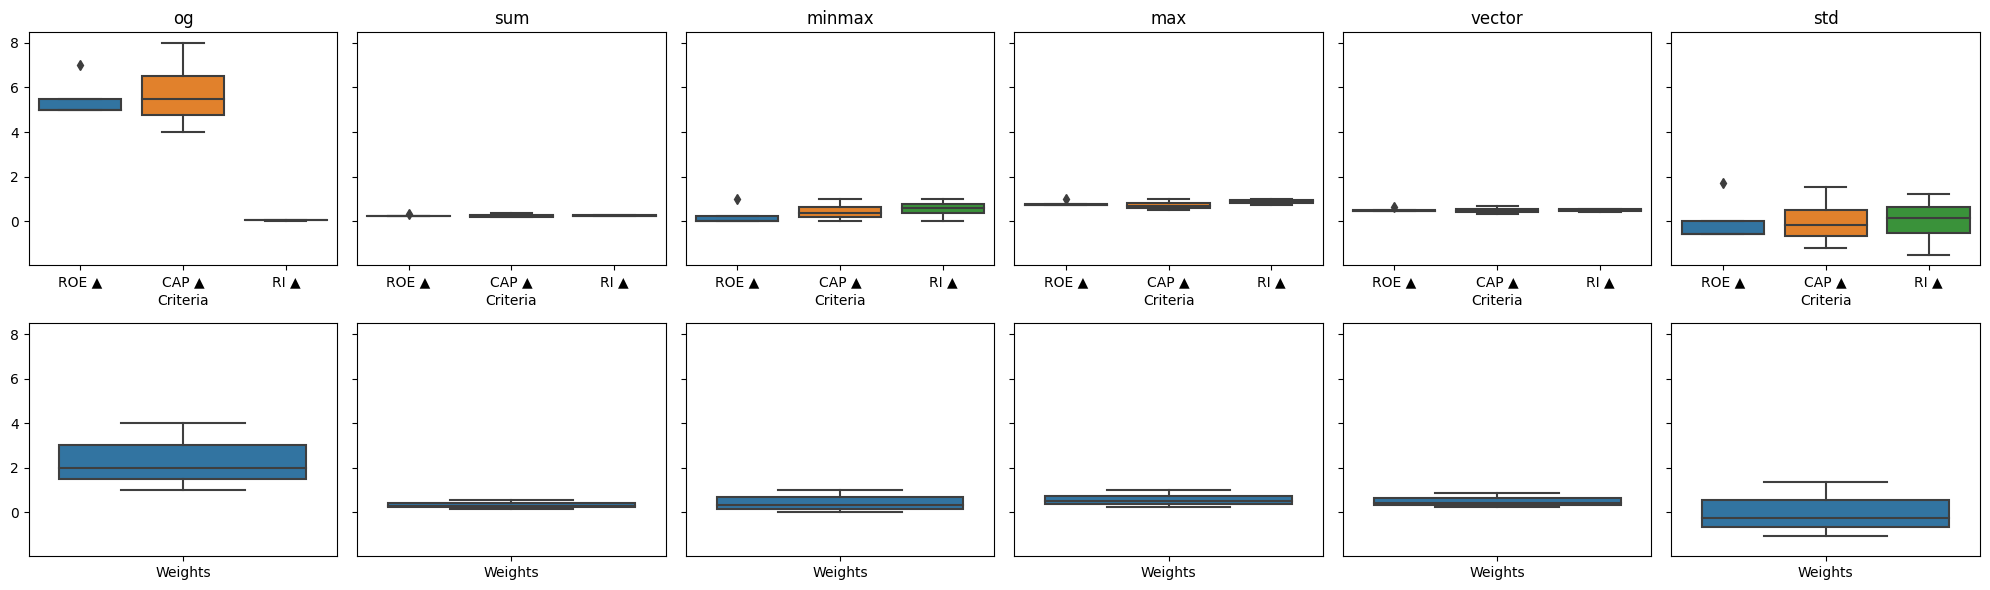

In [64]:
fig, axs = plt.subplots(2, len(scaled), figsize=(20, 6), sharey=True)  # compartimos eje
for (sname, sdm), ax in zip(scaled.items(), axs.T):
    sdm.plot.box(ax=ax[0])
    sdm.plot.wbox(ax=ax[1])
    ax[0].set_title(sname)
fig.tight_layout()

## Ya casi todas las partes del DMD

- Decisor y analista
- Conjunto de elección  - Alternativas ($A_i$)
- Atributos-Objetivos -> Criterios ($C_j$)
- Matriz de decisión ($A=[a_{ij}]$) -- se usa $r_{ij}$ cuando los valores están normalizados.
- Pesos de los criterios - Ponderación ($w_j$)

<table class="clean">
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                C_1 & C_2 & C_3 & \dots & C_n   
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td>
            \begin{bmatrix}
                A_1 \\ A_2 \\ A_3 \\ \vdots \\ A_m
            \end{bmatrix}
        </td>
        <td>
            \begin{bmatrix}
                r_{11} & r_{12} & r_{13} & \dots & r_{1n} \\
                r_{21} & r_{22} & r_{23} & \dots & r_{2n} \\
                r_{31} & r_{32} & r_{33} & \dots & r_{3n} \\
                \vdots & \vdots & \vdots & \ddots & \vdots \\
                r_{m1} & r_{m2} & r_{m3} & \dots & r_{mn}
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                w_1 & w_2 & w_3 & \dots & w_n   
            \end{bmatrix}
        </td>
    </tr>
</table>

## Etapa 9: Método de agregación

Seleccionar un **MÉTODO DE AGREGACIÓN** para determinar una VALORACIÓN GLOBAL  de cada alternativa y establecer un ORDENAMIENTO FINAL.

- **Compensatorios:** _Ponderación lineal/Suma Ponderada/SAM; Producto Ponderado/SPM_
- **Basados en similaridad:** _TOPSIS_, VIKOR.
- **Escuela francesa o no compensatorios:** _ELECTRE_, PROMETHEE.

Suele ser esta etapa la que la gente llama "informalmente" multicriterio.

> **Hint:** Los métodos son muy sensibles al tipo de escalado.

## Ahora sí todas las partes del DMD

- Decisor y analista
- Conjunto de elección  - Alternativas ($A_i$)
- Atributos-Objetivos -> Criterios ($C_j$)
- Matriz de decisión ($A=[a_{ij}]$)
- Pesos de los criterios - Ponderación ($w_j$)
- **Agregación** (Valoración global de cada $A_i$)

<table class="clean">
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                C_1 & C_2 & C_3 & \dots & C_n   
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td>
            \begin{bmatrix}
                A_1 \\ A_2 \\ A_3 \\ \vdots \\ A_m
            \end{bmatrix}
        </td>
        <td>
            \begin{bmatrix}
                r_{11} & r_{12} & r_{13} & \dots & r_{1n} \\
                r_{21} & r_{22} & r_{23} & \dots & r_{2n} \\
                r_{31} & r_{32} & r_{33} & \dots & r_{3n} \\
                \vdots & \vdots & \vdots & \ddots & \vdots \\
                r_{m1} & r_{m2} & r_{m3} & \dots & r_{mn}
            \end{bmatrix}
        </td>
    </tr>
    <tr>
        <td></td>
        <td>
            \begin{bmatrix}
                w_1 & w_2 & w_3 & \dots & w_n   
            \end{bmatrix}
        </td>
    </tr>
</table>    


## Etapa 9: Método Aditivo Simple (SAM) - Ponderación Lineal - Suma Ponderada

- Es uno de los métodos más utilizados, por ser sencillo e intuitivo en su aplicación. 
- *Es compensatorio.*
- Requiere que las evaluaciones y los pesos sean cardinales.
- Necesita una normalización previa de las evaluaciones
- Es muy sensible al procedimiento de normalización utilizado (Suele usarse `SumScaler`). 
- El supuesto teórico más fuerte es que requiere la existencia de una función de utilidad cardinal aditiva para los criterios.
- Falla si algun valor es $< 0$.
- Consiste en construir una función valor $U(A_i)$ para cada alternativa, de la forma:

$$U(A_i) = \sum_{j=1}^n w_j r_{ij}$$

- donde $w_j$ y $r_{ij}$, representan, respectivamente, a los pesos de los criterios
y las preferencias de cada alternativa con respecto a cada criterio, una
vez que han sido normalizados.


## Etapa 9: `skcriteria.madm.simple.WeightedSumModel`

Como se dijo vamos a usar la dm escalada con `SumScaler`

In [65]:
sum_scaled

,ROE[▲ 0.285714],CAP[▲ 0.571429],RI[▲ 0.142857]
PE,0.318182,0.217391,0.209960
JN,0.227273,0.173913,0.282638
AA,0.227273,0.260870,0.262450
GN,0.227273,0.347826,0.244953


In [66]:
from skcriteria.madm.simple import WeightedSumModel
dec = WeightedSumModel()
dec

WeightedSumModel()

In [67]:
result = dec.evaluate(sum_scaled)  # proba con minmax!
result

Alternatives,PE,JN,AA,GN
Rank,3,4,2,1


## Etapa 9: Resultados

Los objetos resultados, tienen varias funcionalidades interesantes

In [68]:
result.rank_ # tiene los valores del ranking

array([3, 4, 2, 1])

In [69]:
result.values # Equivalente

array([3, 4, 2, 1])

In [70]:
result.method  # contiene el nombre del metodo

'WeightedSumModel'

In [71]:
result.to_series()  # para vonvertir el ranking en un pandas series

Alternatives
PE    3
JN    4
AA    2
GN    1
Name: Rank, dtype: int64

## Etapa 9: Resultados

Algunos métodos de agregación pueden devolver rankings empatados. 

Para ver si algún ranking esta asignado a más de una alternativa

In [72]:
result.has_ties_  

False

Tambien se puede desempatar los rankings corriendo los valores a inmediato posterior, dado el orden definido por sus alternativas. 

Algo así: `[3, 1, 1, 1 , 2]` -> `[5, 1, 2, 3, 4]`

In [73]:
result.untied_rank_  

array([3, 4, 2, 1])

Si se quiere ver cuantas alternativas se asignaron a cada ranking

In [74]:
result.ties_

Counter({3: 1, 4: 1, 2: 1, 1: 1})

## Etapa 9: Resultados - `extra_`

Los calculos intermedios de los metodos se almacenan en un atributo llamado `extra_`.

In [75]:
result.extra_

extra({'score'})

Por conveniencia se puede acceder a la misma información con el alias `e_`

In [76]:
result.e_

extra({'score'})

En el caso de `WeightedSumModel` extra solo contiene los scores provenientes de la formula $U(A_i) = \sum_{j=1}^n w_j r_{ij}$

In [77]:
result.e_.score

array([0.24512693, 0.2046908 , 0.25149618, 0.2986861 ])

## Etapa 9: Método Multiplicativo Simple (SMM) - Multiplicación Ponderada

- Es lo mismo que suma ponderada pero con multiplicaciones. 
- *Es compensatorio.*
- Requiere que las evaluaciones y los pesos sean cardinales.
- Necesita una normalización previa de las evaluaciones.
- Los pesos se elevan en vez de multiplicarse.
- Suele potenciar valores extremos.
- Es muy sensible al procedimiento de normalización utilizado (Suele usarse `SumScaler`). 
- Falla si algún valor es $\le 0$.
- Consiste en construir una función valor $U(A_i)$ para cada alternativa, de la forma:

$$U(A_i) = \prod_{j=1}^n (r_{ij})^{w_j}$$

- donde $w_j$ y $r_{ij}$, representan, respectivamente, a los pesos de los criterios
y las preferencias de cada alternativa con respecto a cada criterio, una
vez que han sido normalizados.


## Etapa 9: `skcriteria.madm.simple.WeightedProductModel`

Como se dijo vamos a usar la dm escalada con `SumScaler`

In [78]:
sum_scaled

,ROE[▲ 0.285714],CAP[▲ 0.571429],RI[▲ 0.142857]
PE,0.318182,0.217391,0.209960
JN,0.227273,0.173913,0.282638
AA,0.227273,0.260870,0.262450
GN,0.227273,0.347826,0.244953


In [79]:
from skcriteria.madm.simple import WeightedProductModel
dec = WeightedProductModel()
dec

WeightedProductModel()

In [80]:
result = dec.evaluate(sum_scaled)  # proba con minmax!
result

Alternatives,PE,JN,AA,GN
Rank,3,4,2,1


## Etapa 9: `skcriteria.madm.simple.WeightedProductModel`

Veamos el resultado de extra!

In [81]:
result.extra_

extra({'score'})

In [82]:
result.e_.score

array([-0.61764926, -0.69633518, -0.60030941, -0.53319631])

Pero estos números no me cierran

In [83]:
a_mano = sum_scaled.matrix ** sum_scaled.weights
a_mano.prod(axis="columns")

Alternatives
PE    0.241185
JN    0.201217
AA    0.251010
GN    0.292957
dtype: float64

## Ojo con los underflows!

Multiplicar valores chicos (como los de una matriz escalada) es **MUY** mala idea!.

In [84]:
import numpy as np
np.full(1000, .1).prod()

0.0

In [85]:
a_mano = sum_scaled.matrix ** sum_scaled.weights
np.log10(a_mano.prod(axis="columns"))

Alternatives
PE   -0.617649
JN   -0.696335
AA   -0.600309
GN   -0.533196
dtype: float64

Scikit-Criteria implementa `WeightedProductModel` como una suma de logarítmos!

In [86]:
result.e_.score

array([-0.61764926, -0.69633518, -0.60030941, -0.53319631])

## Integrando

Podemos resumir todo el experimento en una sola ejecución.
Volvamos al comienzo! (pero con pesos)

In [87]:
dm = skc.mkdm(
    matrix=[[7, 5, 35], 
            [5, 4, 26], 
            [5, 6, 28], 
            [3, 4, 36],
            [1, 7, 30],
            [5, 8, 30]],
    objectives=[max, max, min],
    weights=[2, 4, 1],
    alternatives=["PE", "JN", "AA", "FX", "MM", "GN"],
    criteria=["ROE", "CAP", "RI"]
)
dm

,ROE[▲ 2.0],CAP[▲ 4.0],RI[▼ 1.0]
PE,7,5,35
JN,5,4,26
AA,5,6,28
FX,3,4,36
MM,1,7,30
GN,5,8,30


## Pipelines! (Gracias sklearn!)

Para una pipeline de $n$ pasos:

- $n-1$ pasos tienen que ser transformers.
- Paso $n$ tiene que ser un método de decisión.

In [88]:
from skcriteria.pipeline import mkpipe

pipe = mkpipe(
    filters.FilterGE({"ROE": 2}),         # Almenos rendir 2%,
    filters.FilterNonDominated(),         # chau dominadas!
    InvertMinimize(),                     # no más minimización!
    scalers.SumScaler(target="weights"),  # normalizamos los pesos
    scalers.SumScaler(target="matrix"),   # normalizamos la matriz
    WeightedSumModel(),                   # Función de agregación
)
pipe

SKCPipeline(steps=[('filterge', FilterGE(criteria_filters={'ROE': 2}, ignore_missing_criteria=False)), ('filternondominated', FilterNonDominated(strict=False)), ('invertminimize', InvertMinimize()), ('sumscaler_1', SumScaler(target='weights')), ('sumscaler_2', SumScaler(target='matrix')), ('weightedsummodel', WeightedSumModel())])

## Pipelines! (Gracias sklearn!)

In [89]:
pipe.evaluate(dm)  # podemos ejectuar entera a la pipeline!

Alternatives,PE,JN,AA,GN
Rank,3,4,2,1


In [90]:
pipe.transform(dm)  # o evitar el último paso de evaluación

,ROE[▲ 0.285714],CAP[▲ 0.571429],RI[▲ 0.142857]
PE,0.318182,0.217391,0.209960
JN,0.227273,0.173913,0.282638
AA,0.227273,0.260870,0.262450
GN,0.227273,0.347826,0.244953


## Cerrando

- Los metodos MCDA son muy transparentes.
- Sistematizan una serie de problemas de manera muy sencilla.
- El area puede interactuar muy bien con toda la bateria de "cosas" de ciencias de datos.
- Da un marco de analisis al proceso de toma de decisiones por parte de algun experto.
- Scikit-Criteria no solo es unaherramienta para hacer MCDM, sino que implementa técnicas y funcionalidades para realizar un análisis completo de la toma decisiones.

## GRACIAS.

Juan - jbcabral@unc.edu.ar

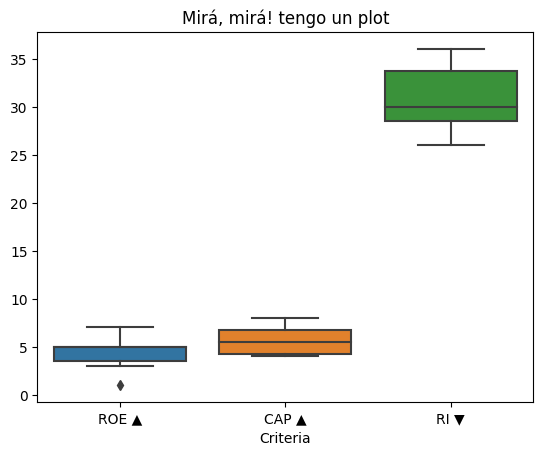

In [91]:
ax = dm.plot.box();
ax.set_title("Mirá, mirá! tengo un plot");